In [1]:
from light_curves import LightCurve
from exposures import Calexp
from task import Run
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ratio_lc_area = [0.05,0.1,0.15]
radius = [20,11,10,9]
problems = []
# start = False
for n in n_points:
    for rad in radius:
        # if n==70 and lvl==11:
        #     start=True
        # if start:
        print(f"||||||||||||||----------- POINT: {n} ------ LEVEL: {lvl} -----------||||||||||||||")
        process = Run(name = f"run_{n}pts_{rad}radius", query_calexps="overlap", radius=rad)
        process.inject_task()
        schema = process.measure_task()
        params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
        process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145)
        for p in params[1:]:
            process.add_lc(p, dist=0.2)
        # process.sky_map()
        process.log_task("Add and simulate light curves")
        for j, dataId in enumerate(process.calexp_dataIds[:10]):
            print(f" ------ CALEXP {j+1}/10 ------")
            calexp = Calexp(dataId)
            # ax = calexp.plot() # plotear cada calexp con los puntos a inyectar y chequear si efectivamente contiene la cantidad que la funcion de inyeccion dice que contiene
            injected_exp, injected_points = process.inject_calexp(calexp, save_fit=f"calexp_{j}.fit")
            if injected_exp != None:
                sources = process.measure_calexp(injected_exp, schema)
                flux, flux_err = process.find_flux(sources, injected_points, save=dataId)
                for f, ferr, lc_idx in zip(flux, flux_err, injected_points):
                    lc = process.inj_lc[lc_idx]
                    mag, mag_err = calexp.get_mag(f, ferr)
                    lc.add_mag(mag, mag_err, dataId)
                    print(f"ra = {lc.ra}, dec = {lc.dec}")
                    print("Measured ", mag, mag_err)
                    print("Injected ", lc.data["mag_sim"][j])
                    if abs(mag-lc.data["mag_sim"][j])>1:
                        problems.append((calexp,sources))
                
        process.save_lc()
        process.save_time_log()
        process.time_analysis()
        process.sky_map()
    


||||||||||||||----------- POINT: 50 ------ LEVEL: 9 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 2353633 - HTM_level=9 (bounded by a circle of radius ~561.27 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 514 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


 ------ CALEXP 1/10 ------
Points injected: 2
[10, 37]


Searching in lc 10
Searching in lc 37
ra = 57.54856374440088, dec = -32.672283712542615
Measured  19.222914813479196 0.005872746949709428
Injected  19.224290195098348
ra = 57.5238573093214, dec = -32.65873030510227
Measured  22.501706256835273 0.07450376618500265
Injected  22.53041264407794
 ------ CALEXP 2/10 ------
Points injected: 40
[0, 1, 3, 4, 5, 6, 7, 8, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49]


Searching in lc 0
Searching in lc 1
Searching in lc 3
Searching in lc 4
Searching in lc 5
Searching in lc 6
Searching in lc 7
Searching in lc 8
Searching in lc 11
Searching in lc 13
Searching in lc 15
Searching in lc 16
Searching in lc 17
Searching in lc 18
Searching in lc 19
Searching in lc 20
Searching in lc 21
Searching in lc 22
Searching in lc 23
Searching in lc 24
Searching in lc 25
Searching in lc 26
Searching in lc 27
Searching in lc 28
Searching in lc 29
Searching in lc 31
Searching in lc 33
Searching in lc 34
Searching in lc 35
Searching in lc 36
Searching in lc 38
Searching in lc 41
Searching in lc 42
Searching in lc 43
Searching in lc 44
Searching in lc 45
Searching in lc 46
Searching in lc 47
Searching in lc 48
Searching in lc 49
ra = 57.59451632893858, dec = -32.481152201226145
Measured  17.994147885869737 0.0029192126371771986
Injected  17.999800399179982
ra = 57.62069358964389, dec = -32.637404611605604
Measured  18.11694144469525 0.0031200636540546015
Injected  18.12224

Searching in lc 2
Searching in lc 9
Searching in lc 10
Searching in lc 12
Searching in lc 14
Searching in lc 18
Searching in lc 22
Searching in lc 32
Searching in lc 37
Searching in lc 39
Searching in lc 40
ra = 57.50562978570095, dec = -32.64848910394702
Measured  18.23195299652733 0.0033920238389218583
Injected  18.244424459038253
ra = 57.50176964817662, dec = -32.650050826181044
Measured  19.09372034299661 0.005675824029410904
Injected  19.101567316181107
ra = 57.54856374440088, dec = -32.672283712542615
Measured  19.20734232670568 0.006122585196165755
Injected  19.224016295772945
ra = 57.50260290504448, dec = -32.648282998240724
Measured  19.4592400787533 0.007236558614661087
Injected  19.46891425495662
ra = 57.48591383505169, dec = -32.67266564816517
Measured  19.712923836359565 0.00862797521406421
Injected  19.713812214140294
ra = 57.5420984482355, dec = -32.628960709340554
Measured  20.203353892812817 0.012319583422777237
Injected  20.20360813250764
ra = 57.54996685473852, dec =

Searching in lc 1
Searching in lc 4
Searching in lc 7
Searching in lc 11
Searching in lc 21
Searching in lc 23
Searching in lc 38
Searching in lc 43
Searching in lc 45
Searching in lc 46
ra = 57.62069358964389, dec = -32.637404611605604
Measured  18.12049820168802 0.003190601441225655
Injected  18.121975479446416
ra = 57.65619144708684, dec = -32.670686770763616
Measured  18.484947227730707 0.003918831069513166
Injected  18.489322418221924
ra = 57.602782281878554, dec = -32.64458501715527
Measured  18.842999589881785 0.0048583516142788755
Injected  18.856669356997436
ra = 57.625969352314506, dec = -32.642555069726214
Measured  19.329215552180166 0.006624205204266497
Injected  19.346465275364782
ra = 57.69732847482308, dec = -32.65039600467563
Measured  22.153503173176397 0.06155367990250683
Injected  20.570955071283148
ra = 57.760519965358306, dec = -32.666483722841676
Measured  23.294236151283112 0.17144805464025922
Injected  20.815853030466823
ra = 57.666727345536714, dec = -32.67384

Loading calexps: 100%|██████████| 514/514 [19:01<00:00,  2.22s/it]


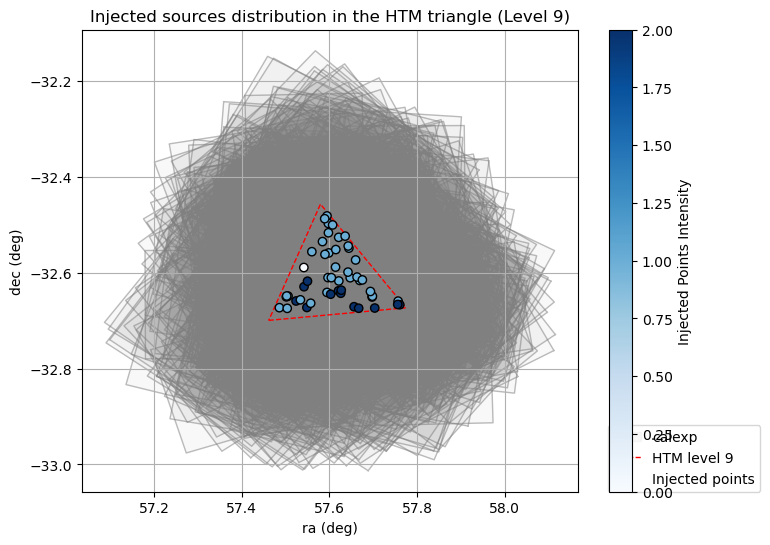

||||||||||||||----------- POINT: 50 ------ LEVEL: 10 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 9414534 - HTM_level=10 (bounded by a circle of radius ~280.63 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 313 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


 ------ CALEXP 1/10 ------
Points injected: 37
[0, 1, 2, 3, 4, 5, 8, 10, 12, 13, 14, 16, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 40, 41, 42, 43, 44, 45, 48, 49]


Searching in lc 0
Searching in lc 1
Searching in lc 2
Searching in lc 3
Searching in lc 4
Searching in lc 5
Searching in lc 8
Searching in lc 10
Searching in lc 12
Searching in lc 13
Searching in lc 14
Searching in lc 16
Searching in lc 18
Searching in lc 19
Searching in lc 21
Searching in lc 22
Searching in lc 23
Searching in lc 24
Searching in lc 25
Searching in lc 26
Searching in lc 27
Searching in lc 28
Searching in lc 29
Searching in lc 30
Searching in lc 32
Searching in lc 33
Searching in lc 34
Searching in lc 36
Searching in lc 37
Searching in lc 40
Searching in lc 41
Searching in lc 42
Searching in lc 43
Searching in lc 44
Searching in lc 45
Searching in lc 48
Searching in lc 49
ra = 57.59451632893858, dec = -32.481152201226145
Measured  17.994321805644834 0.0029193834878855868
Injected  17.999800399179982
ra = 57.642449626863595, dec = -32.528778228304276
Measured  18.119950144765028 0.0031173663469491212
Injected  18.12224937877182
ra = 57.61497025995724, dec = -32.5586064127

Searching in lc 0
Searching in lc 1
Searching in lc 2
Searching in lc 3
Searching in lc 4
Searching in lc 5
Searching in lc 6
Searching in lc 7
Searching in lc 8
Searching in lc 9
Searching in lc 11
Searching in lc 12
Searching in lc 13
Searching in lc 14
Searching in lc 15
Searching in lc 16
Searching in lc 17
Searching in lc 18
Searching in lc 19
Searching in lc 20
Searching in lc 21
Searching in lc 22
Searching in lc 23
Searching in lc 24
Searching in lc 25
Searching in lc 26
Searching in lc 27
Searching in lc 28
Searching in lc 29
Searching in lc 30
Searching in lc 33
Searching in lc 34
Searching in lc 35
Searching in lc 36
Searching in lc 37
Searching in lc 38
Searching in lc 39
Searching in lc 40
Searching in lc 41
Searching in lc 42
Searching in lc 43
Searching in lc 44
Searching in lc 45
Searching in lc 46
Searching in lc 47
Searching in lc 48
Searching in lc 49
ra = 57.59451632893858, dec = -32.481152201226145
Measured  17.996999024786266 0.0028472018252343034
Injected  17.999

Searching in lc 1
Searching in lc 4
Searching in lc 10
Searching in lc 16
Searching in lc 21
Searching in lc 23
Searching in lc 26
Searching in lc 28
Searching in lc 32
Searching in lc 33
Searching in lc 36
Searching in lc 37
Searching in lc 40
ra = 57.642449626863595, dec = -32.528778228304276
Measured  18.120655816195054 0.0030403256438734116
Injected  18.121975430144985
ra = 57.62507957213043, dec = -32.54047556828128
Measured  18.487568142717915 0.003692680323440165
Injected  18.489322368920494
ra = 57.65546972705306, dec = -32.565209837573605
Measured  19.224264741452238 0.005586262193894199
Injected  19.224016246471514
ra = 57.635082998062245, dec = -32.54861914969935
Measured  19.9616519132696 0.008944834903753012
Injected  19.958710124022534
ra = 57.641885074952185, dec = -32.541696617862684
Measured  20.5684113930279 0.013688985332089202
Injected  20.570955021981717
ra = 57.62870587387553, dec = -32.51586083901543
Measured  20.801332329184937 0.016322077271657076
Injected  20.

Loading calexps:   9%|▉         | 29/313 [00:57<10:11,  2.15s/it]

In [ ]:
n_points = [50,100,150]
levels = [9,10,11,12]
problems = []
# start = False
for n in n_points:
    for lvl in levels:
        # if n==70 and lvl==11:
        #     start=True
        # if start:
        print(f"||||||||||||||----------- POINT: {n} ------ LEVEL: {lvl} -----------||||||||||||||")
        process = Run(name = f"run_{n}pts_{lvl}lvl", htm_level=lvl)
        process.inject_task()
        schema = process.measure_task()
        params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
        process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145)
        for p in params[1:]:
            process.add_lc(p, dist=0.00000001)
        # process.sky_map(calexps=False)
        process.log_task("Add and simulate light curves")
        for j, dataId in enumerate(process.calexp_dataIds[:5]):
            print(f" ------ CALEXP {j+1}/10 ------")
            calexp = Calexp(dataId)
            # ax = calexp.plot() # plotear cada calexp con los puntos a inyectar y chequear si efectivamente contiene la cantidad que la funcion de inyeccion dice que contiene
            injected_exp, injected_points = process.inject_calexp(calexp, save_fit=f"calexp_{j}.fit")
            if injected_exp != None:
                sources = process.measure_calexp(injected_exp, schema)
                flux, flux_err = process.find_flux(sources, injected_points, save=dataId)
                for f, ferr, lc_idx in zip(flux, flux_err, injected_points):
                    lc = process.inj_lc[lc_idx]
                    mag, mag_err = calexp.get_mag(f, ferr)
                    lc.add_mag(mag, mag_err, dataId)
                    print(f"ra = {lc.ra}, dec = {lc.dec}")
                    print("Measured ", mag, mag_err)
                    print("Injected ", lc.data["mag_sim"][j])

        process.sky_map()
    


### Run results

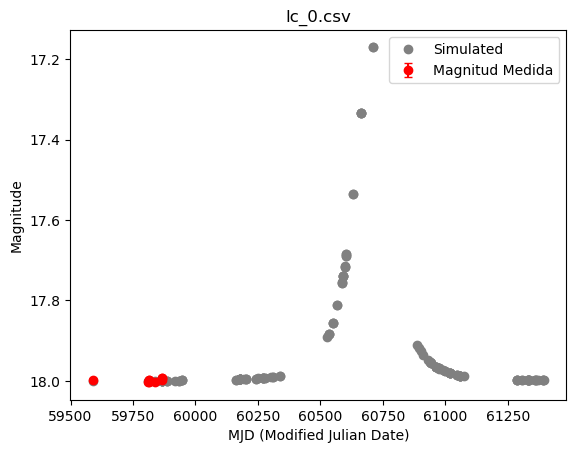

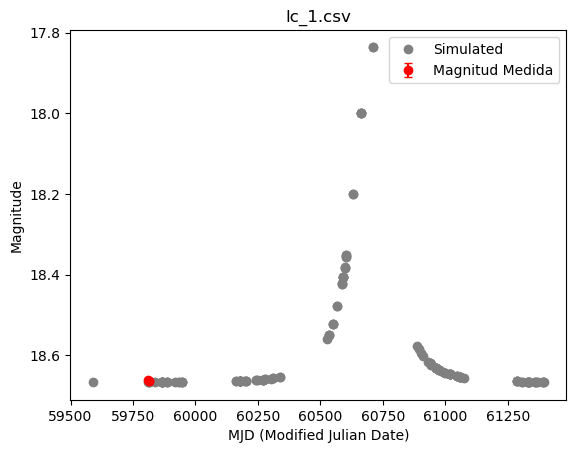

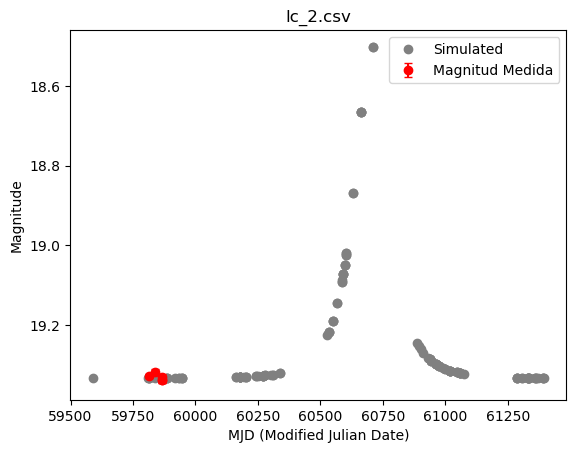

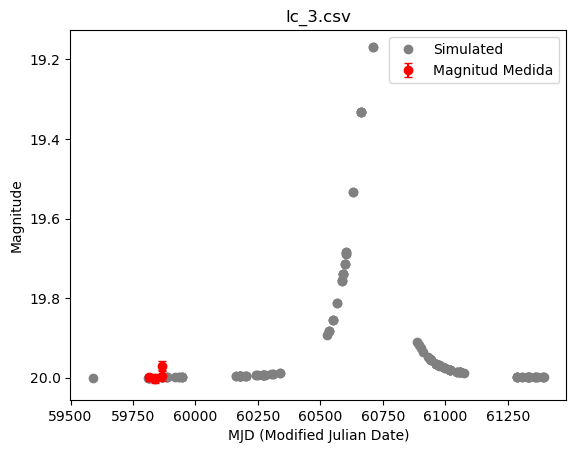

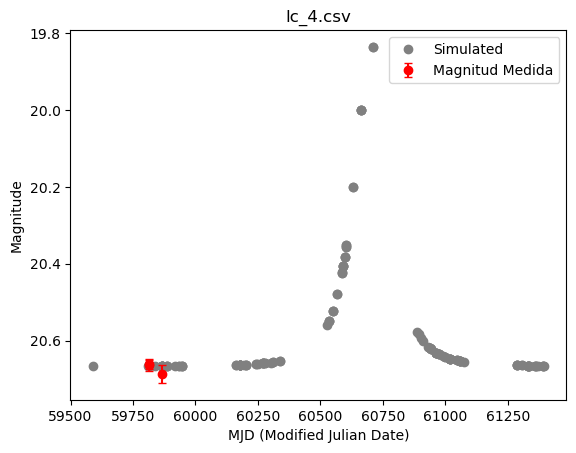

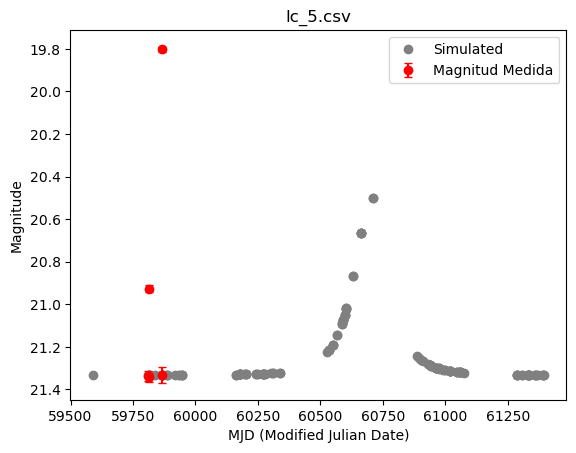

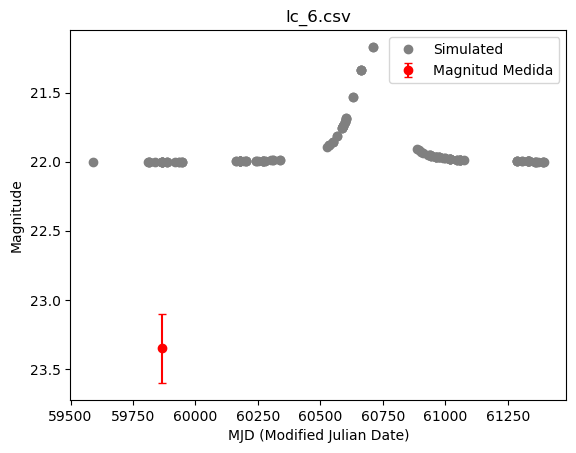

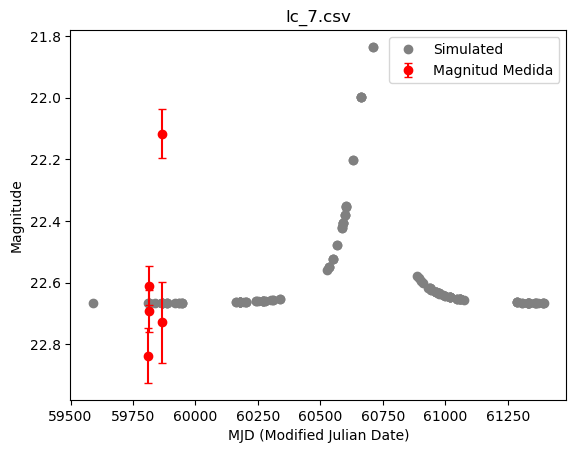

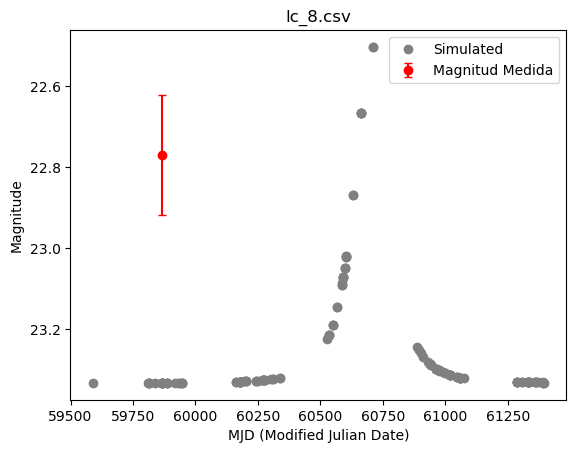

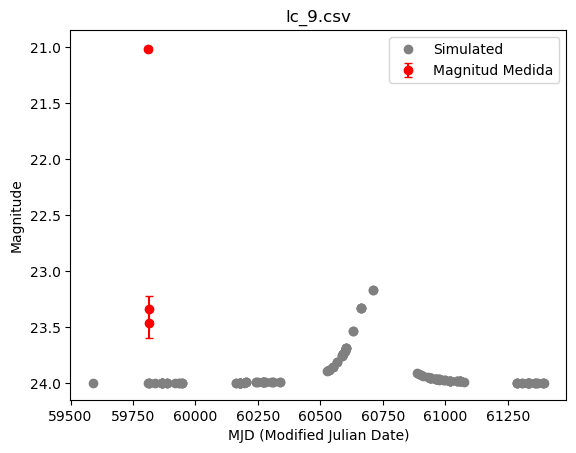

In [3]:
# Plot light curves from a run
import pandas as pd
n=10; lvl = 20
path = f"runs/run_{n}pts_{lvl}lvl/"
for lc_path in sorted([file for file in os.listdir(path) if file.startswith("lc")]):
    lc = LightCurve(data=pd.read_csv(path+lc_path))
    lc.plot(title = lc_path)


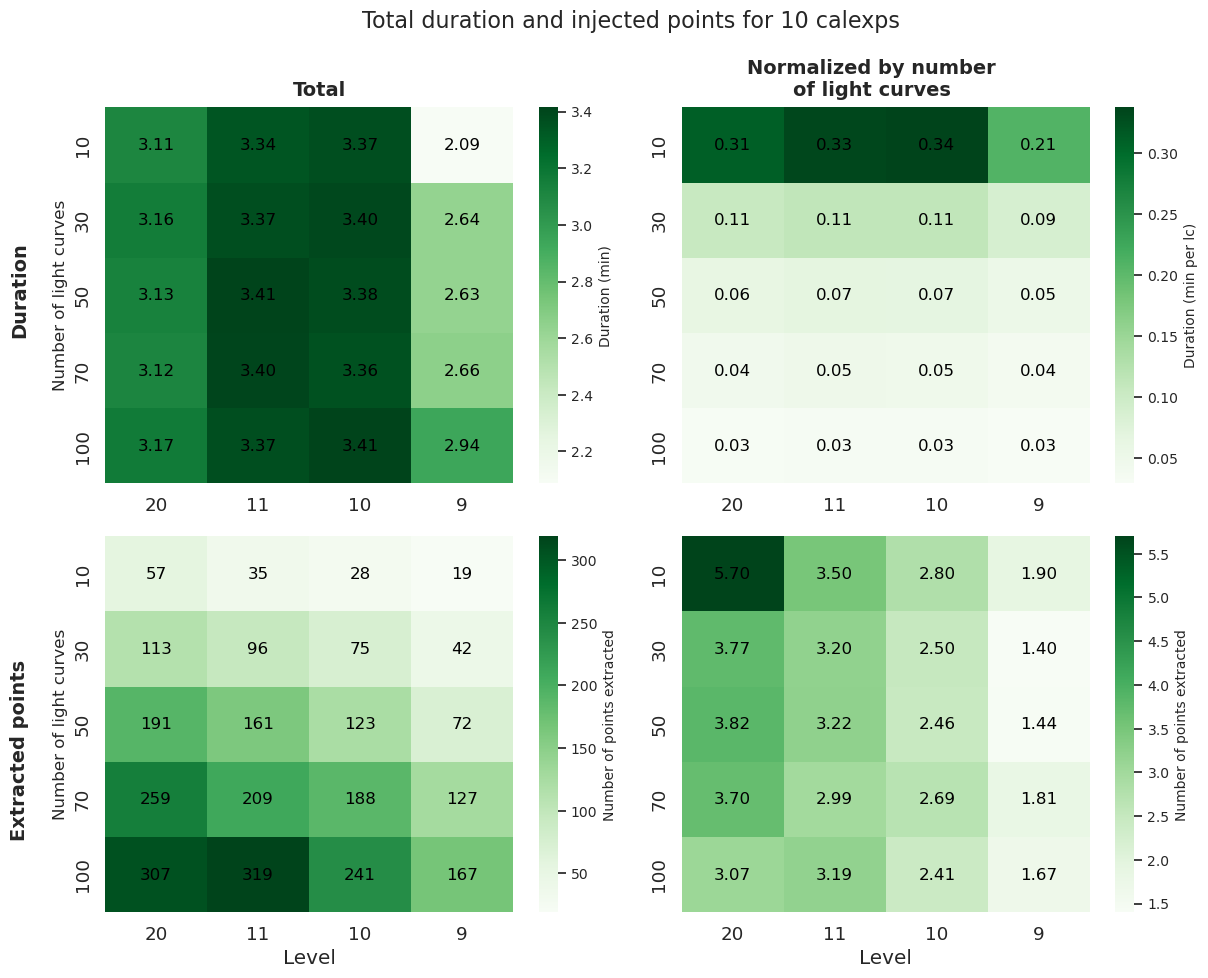

In [132]:
# Total durations and total extracted points per HTM level and points injected
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)


fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
fig.suptitle("Total duration and injected points for 10 calexps", fontsize=16) 

# Gráfico 1: Duration
sns.heatmap(durations, cmap='Greens', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[0, 0])
cbar = axes[0, 0].collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  
cbar.set_label('Duration (min)', fontsize=10)  
axes[0, 0].set_ylabel('Number of light curves', fontsize=12)
# axes[0, 0].set_title('Duration')

# Gráfico 2: Duration - Normalized
sns.heatmap(durations_normalized, cmap='Greens', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[0, 1])
cbar = axes[0, 1].collections[0].colorbar
cbar.ax.tick_params(labelsize=10) 
cbar.set_label('Duration (min per lc)', fontsize=10)  # Ajustar el tamaño de la etiqueta del colorbar
# axes[0, 1].set_title('Duration - Normalized')

# Gráfico 3: Injected points
sns.heatmap(points, cmap='Greens', annot=True, fmt=".0f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Number of points injected'}, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[1, 0])
cbar = axes[1, 0].collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  # Ajustar el tamaño de los ticks
cbar.set_label('Number of points extracted', fontsize=10)  # Ajustar el tamaño de la etiqueta del colorbar
axes[1, 0].set_xlabel('Level')
axes[1, 0].set_ylabel('Number of light curves', fontsize=12)
# axes[1, 0].set_title('Injected points')

# Gráfico 4: Injected points - Normalized
sns.heatmap(points_normalized, cmap='Greens', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Number of points injected'}, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[1, 1])
cbar = axes[1, 1].collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  # Ajustar el tamaño de los ticks
cbar.set_label('Number of points extracted', fontsize=10)  # Ajustar el tamaño de la etiqueta del colorbar
axes[1, 1].set_xlabel('Level')
# axes[1, 1].set_title('Injected points - Normalized')

# Etiquetas de las filas y columnas
fig.text(0.24, 0.9, 'Total', ha='center', va='center', fontsize=14, fontweight='bold')
fig.text(0.7, 0.91, 'Normalized by number\nof light curves', ha='center', va='center', fontsize=14, fontweight='bold')

fig.text(-0.01, 0.7, 'Duration', ha='center', va='center', fontsize=14, fontweight='bold', rotation='vertical')
fig.text(-0.01, 0.24, 'Extracted points', ha='center', va='center', fontsize=14, fontweight='bold', rotation='vertical')

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.95])  # rect ajusta el espacio para el título general
plt.savefig('runs/test_10_calexps/comparative_analysis.png', bbox_inches='tight')  # Guardar la figura combinada
plt.show()


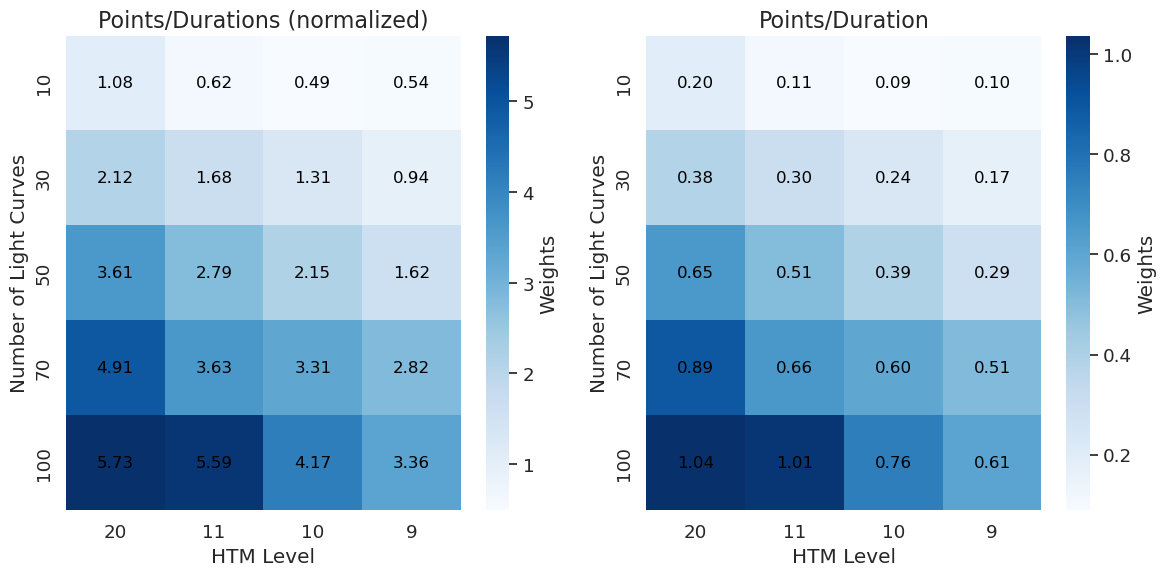

In [144]:
# Optimization index: maximize [extracted_points]/[duration]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n_points = [10, 30, 50, 70, 100]
levels = [20, 11, 10, 9]
durations = np.zeros((len(n_points), len(levels)))
durations_normalized = np.zeros((len(n_points), len(levels)))
points = np.zeros((len(n_points), len(levels)))
points_normalized = np.zeros((len(n_points), len(levels)))
weights = np.zeros((len(n_points), len(levels)))

for i, n in enumerate(n_points):
    for j, lvl in enumerate(levels):
        time_path = f"runs/test_10_calexps/run_{n}pts_{lvl}lvl/time_log.csv"
        df = pd.read_csv(time_path)
        points[i, j] = sum(df[df["task"] == "Finding points"]["detail"])
        points_normalized[i, j] = sum(df[df["task"] == "Finding points"]["detail"]) / n
        times = df["time"].values
        total_duration = times[-1] - times[1]
        durations[i, j] = total_duration / 60
        durations_normalized[i, j] = (total_duration / 60) / n

weights_1 = (points_normalized / np.max(points_normalized)) / (durations_normalized / np.max(durations_normalized))
weights_2 = (points / np.max(points)) / (durations / np.max(durations))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(weights_1, cmap='Blues', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Weights'}, annot_kws={'size': 12, 'color': 'black'}, ax=axes[0])
axes[0].set_xlabel('HTM Level')
axes[0].set_ylabel('Number of Light Curves')
axes[0].set_title('Points/Durations (normalized)', fontsize=16)

sns.heatmap(weights_2, cmap='Blues', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Weights'}, annot_kws={'size': 12, 'color': 'black'}, ax=axes[1])
axes[1].set_xlabel('HTM Level')
axes[1].set_ylabel('Number of Light Curves')
axes[1].set_title('Points/Duration', fontsize=16)

plt.tight_layout()
plt.savefig('runs/test_10_calexps/optimization_analysis_combined.png', bbox_inches='tight')
plt.show()


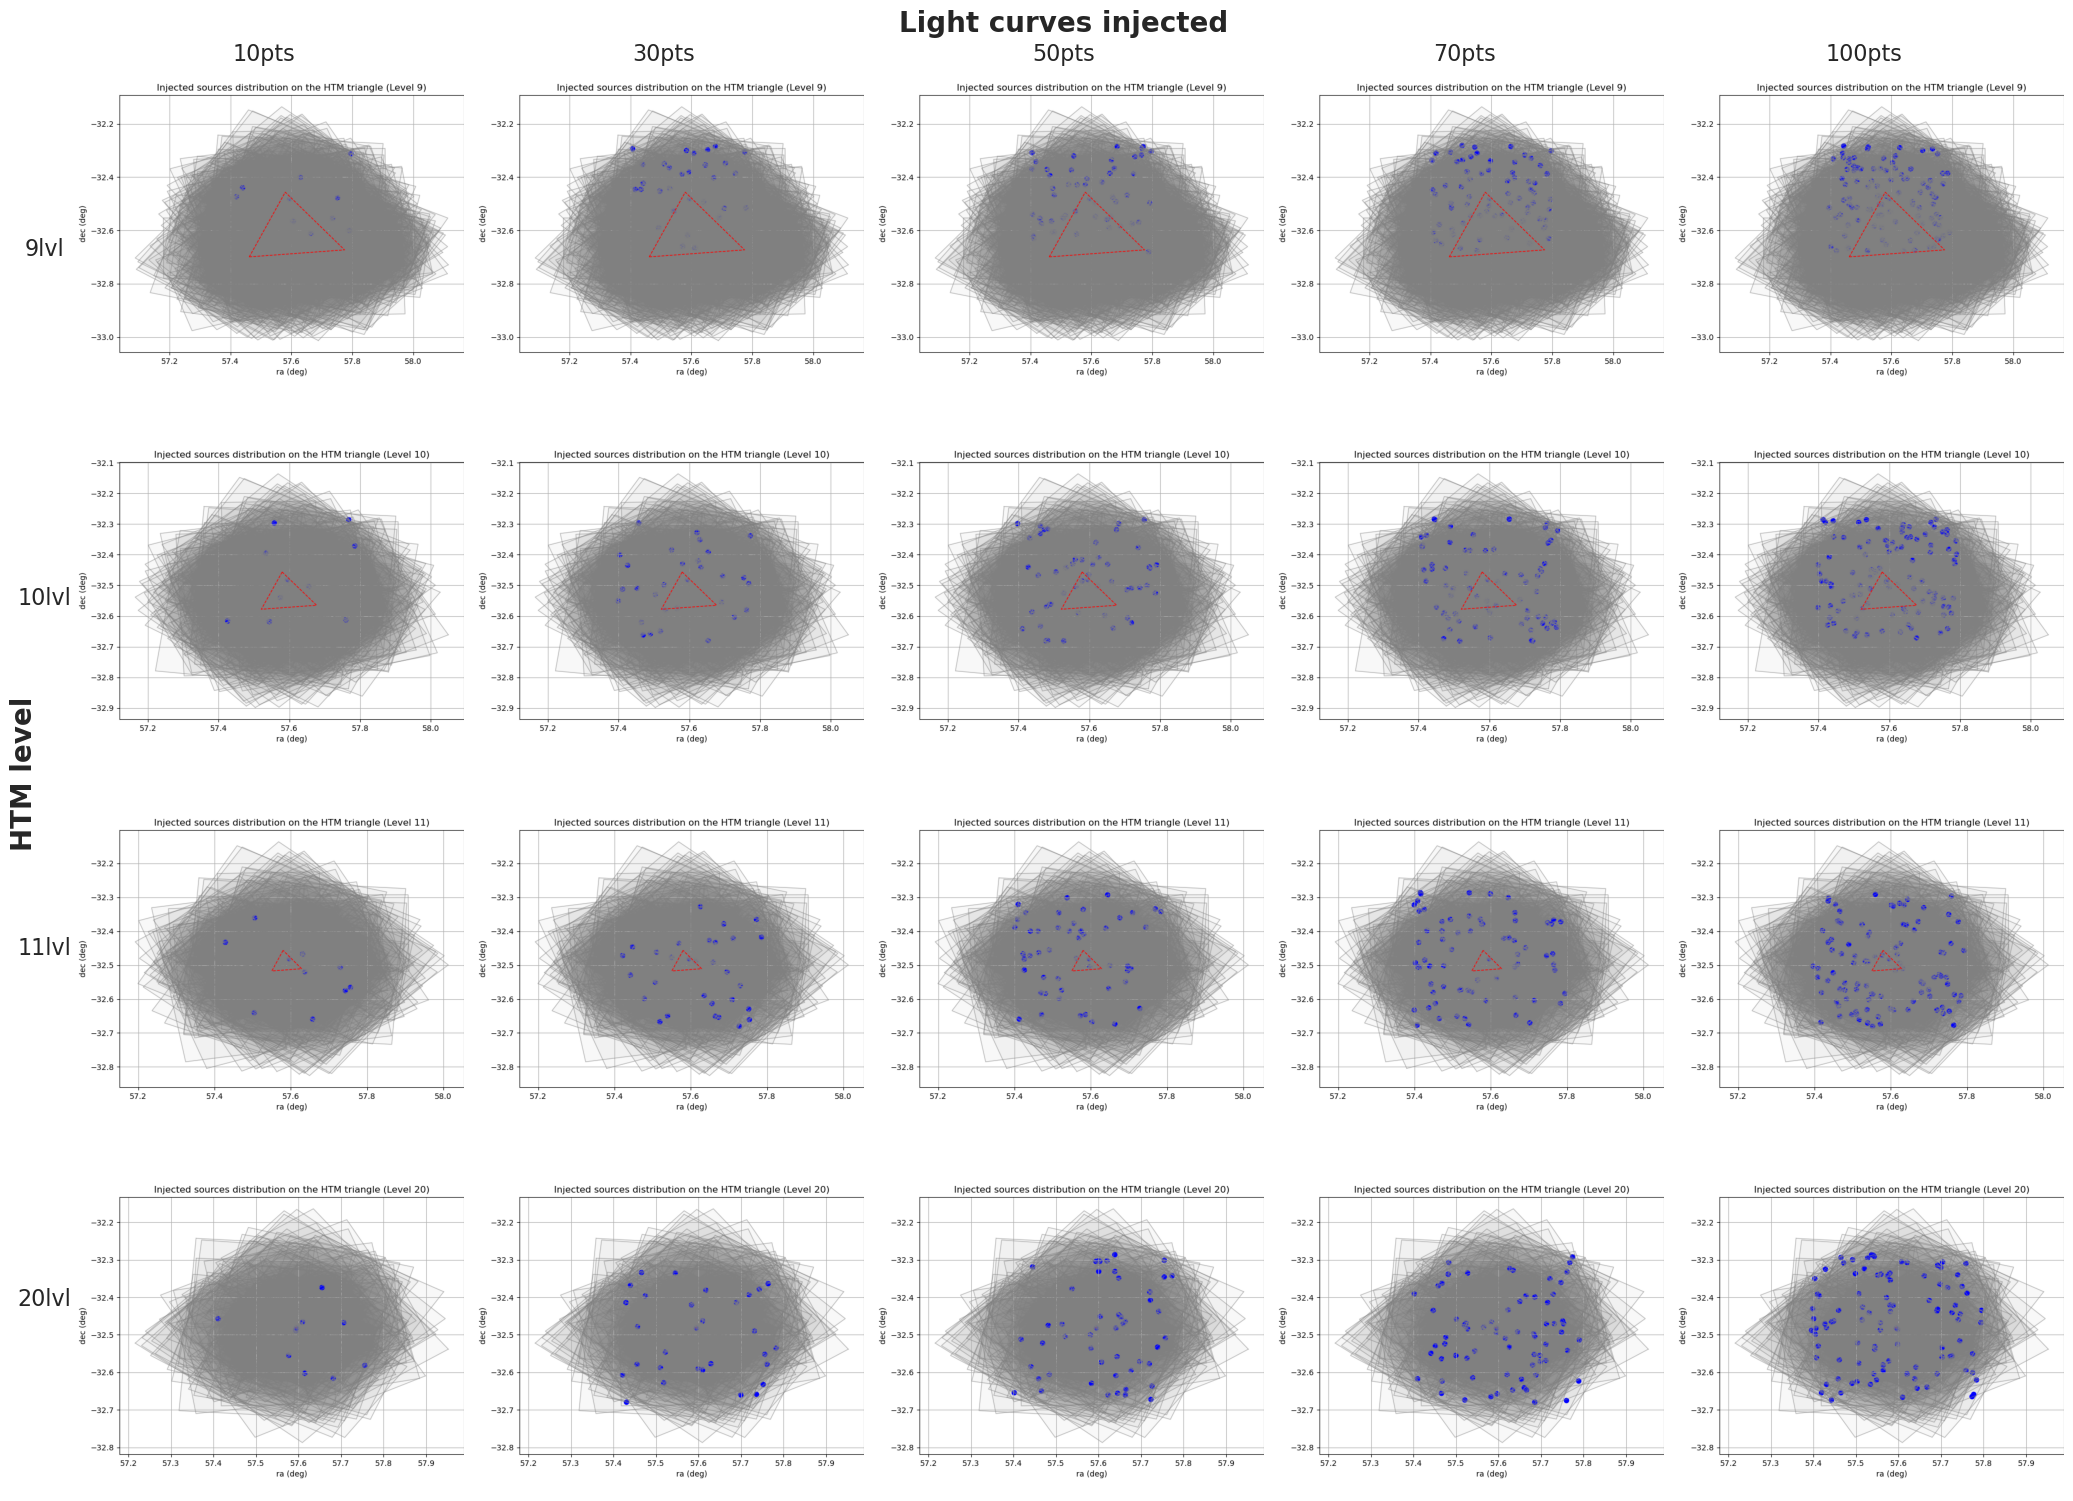

In [133]:
# Sky plots of injected sources + HTM triangle + calexps (for each combination of lvl and n_lc
import os
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

main_folder = "runs/test_10_calexps"
pattern = r"run_(\d+)pts_(\d+)lvl"

plots = []
pts_values = []
lvl_values = []

for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        match = re.match(pattern, subfolder)
        if match:
            pts, lvl = match.groups()
            pts_values.append(int(pts))
            lvl_values.append(int(lvl))
            
            sky_map_path = os.path.join(subfolder_path, "sky_map.png")
            if os.path.exists(sky_map_path):
                plots.append(sky_map_path)

unique_pts = sorted(set(pts_values))  
unique_lvl = sorted(set(lvl_values)) 


fig, axes = plt.subplots(len(unique_lvl), len(unique_pts), figsize=(20, 15))
axes = axes.reshape((len(unique_lvl), len(unique_pts)))
for i, lvl in enumerate(unique_lvl):
    for j, pts in enumerate(unique_pts):
        matching_plots = [plot for plot, p, l in zip(plots, pts_values, lvl_values) if p == pts and l == lvl]
        if matching_plots:
            img = Image.open(matching_plots[0])
            width, height = img.size
            new_width = int(width * 0.9) 
            img_cropped = img.crop((0, 0, new_width, height)) 
            img_cropped = img_cropped.convert("RGB")  
            img_array = np.array(img_cropped)
            ax = axes[i, j]
            ax.imshow(img_array)
            ax.axis('off')

fig.text(0.5, 1, 'Light curves injected', ha='center', va='center', fontsize=20, fontweight='bold')

for i, pts in enumerate(unique_pts):
    fig.text(0.1 + i * (0.8 / (len(unique_pts) - 1)), 0.98, f'{pts}pts', ha='center', va='center', fontsize=16)

fig.text(-0.02, 0.5, 'HTM level', ha='center', va='center', fontsize=20, fontweight='bold', rotation='vertical')

for i, lvl in enumerate(unique_lvl):
    fig.text(-0.01, 0.85 - i * (0.7 / (len(unique_lvl) - 1)), f'{lvl}lvl', ha='center', va='center', fontsize=16)

plt.subplots_adjust(hspace=0.01, wspace=0.01)  
plt.tight_layout(pad=0.01)
plt.savefig(main_folder+"/all_sky_maps.png", bbox_inches='tight')
plt.show()


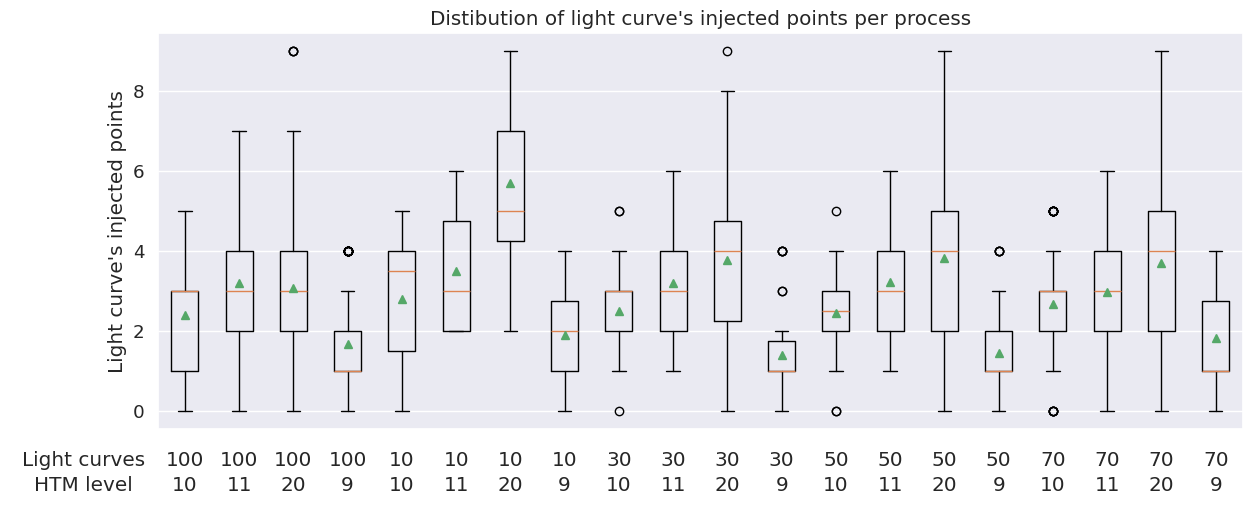

In [67]:
# Distribution of points extracted per light curve for each combination of HMTlevel and injected light curve
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

main_folder = "runs/test_10_calexps"
data_counts = []
pts_values = []
lvl_values = []

for subfolder in sorted([file for file in os.listdir(main_folder) if file.startswith("run")]):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        match = re.match(r'run_(\d+)pts_(\d+)lvl', subfolder)
        if match:
            pts, lvl = match.groups()
            pts_values.append(pts)
            lvl_values.append(lvl)

            mag_counts = []
            for file in os.listdir(subfolder_path):
                if file.endswith(".csv"):
                    file_path = os.path.join(subfolder_path, file)
                    df = pd.read_csv(file_path)
                    if "mag" in df.columns:
                        mag_count = df["mag"].count() 
                        mag_counts.append(mag_count)
            if mag_counts:
                data_counts.append(mag_counts)

from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(14, 6))
gs = GridSpec(2, 1, height_ratios=[9, 1], hspace=0.1)  

ax_boxplot = fig.add_subplot(gs[0])
ax_boxplot.boxplot(data_counts, showmeans=True)
ax_boxplot.set_ylabel("Light curve's injected points")
ax_boxplot.set_title("Distibution of light curve's injected points per process")
ax_boxplot.set_xticks([])  

ax_table = fig.add_subplot(gs[1])
ax_table.axis("off")  

table_data = [pts_values, lvl_values]
row_labels = ["Light curves", "HTM level"]
table = ax_table.table(cellText=table_data, rowLabels=row_labels,loc="center", cellLoc='center', rowLoc='center')

for cell in table.properties()['celld'].values():
    cell.set_linewidth(0)  

table.scale(1, 1.5) 
plt.savefig(main_folder+"/injected_points_per_lc_analysis.png")
plt.show()

### Sources analysis

Text(0.5, 1.0, 'Number of sources per calexp (total = 36)')

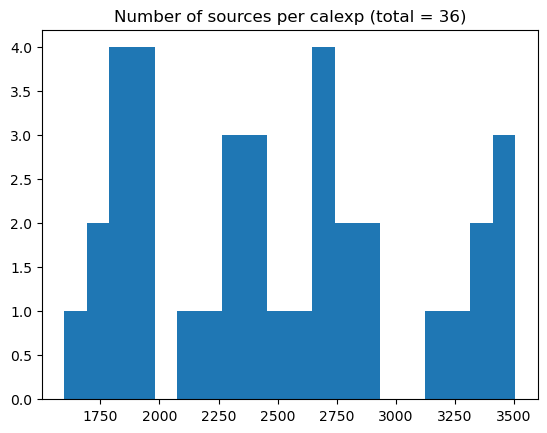

In [17]:
import matplotlib.pyplot as plt
plt.hist(n_sources, bins = 20)
plt.title(f"Number of sources per calexp (total = {len(n_sources)})")

### Collect calexps analysis (Overlap / HTM)
* Inserting into the region (circle / triangle)
* Number of calexps

analysis/overlap_calexps
analysis/htm_calexps

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from light_curves import LightCurve
from exposures import Calexp
from task import Run
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

#### Defining position to insert (into the region)

||||||||||||||------------LEVEL: 20 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)/nHTM_ID = 9871854450032 - HTM_level=20 (bounded by a circle of radius ~0.27 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 145 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


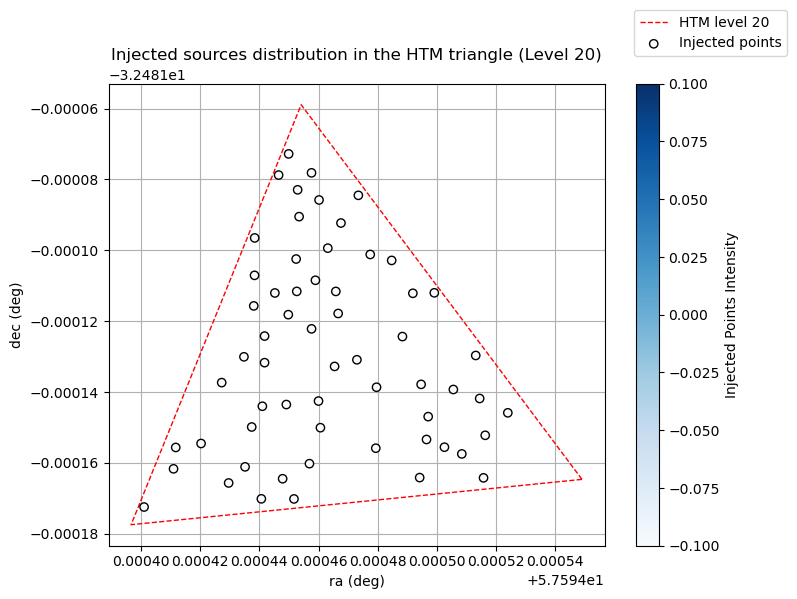

In [8]:
# check triangle injection HTM
ratio_lc_area = [0.05,0.1,0.15]
levels = [20]
problems = []
numb = [60, 25, 40, 55]
for n, lvl in zip(numb,levels):
    print(f"||||||||||||||------------LEVEL: {lvl} -----------||||||||||||||")
    process = Run(name = f"test_triangle", htm_level=lvl)
    params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
    process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145, band="i")
    for p in params[1:]:
        process.add_lc(p, dist=0.0001)
    process.sky_map(calexps=False)

||||||||||||||------------LEVEL: 20 -----------||||||||||||||
Found 171 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


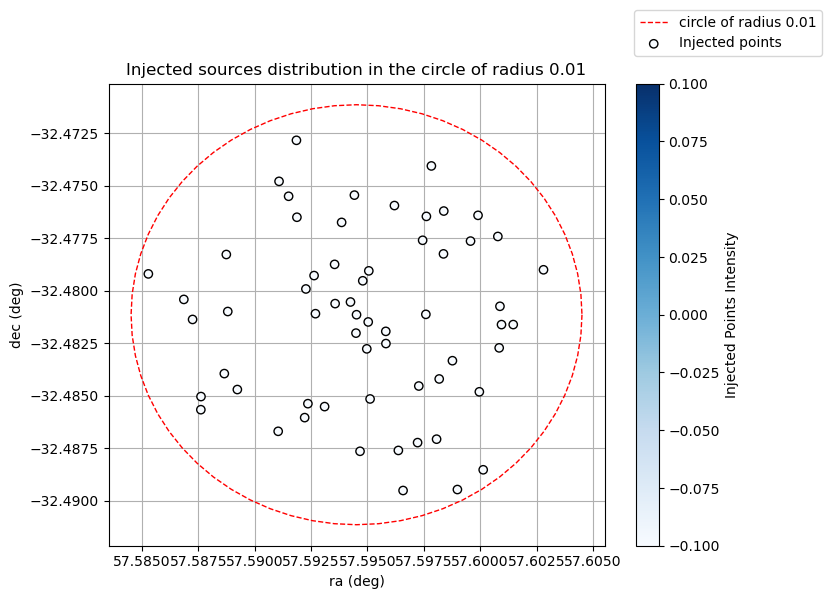

In [7]:
# check circle injection OVERLAP
ratio_lc_area = [0.05,0.1,0.15]
levels = [20]
problems = []
numb = [60, 25, 40, 55]
for n, lvl in zip(numb,levels):
    print(f"||||||||||||||------------LEVEL: {lvl} -----------||||||||||||||")
    process = Run(name = f"test_triangle", query_calexps = "overlap", radius = 1e-2)
    params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
    process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145, band = "i")
    for p in params[1:]:
        process.add_lc(p, dist=0.0001)
    process.sky_map(calexps=False)

#### Number of calexps 
per HTM level or radius

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from task import Run
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
bands = list("ugrizy")
types = ["overlap", "htm"]
levels = list(range(1, 21)) 
rows = list(itertools.product(bands, types))
columns = ["band", "type"] + levels
df = pd.DataFrame(rows, columns=["band", "type"])
radius_row = pd.DataFrame([{"band": "radius", "type": "radius", **{level: None for level in levels}}])
data = pd.DataFrame([{**{"band": band, "type": t}, **{level: None for level in levels}} for band, t in rows])
df = pd.concat([radius_row, data], ignore_index=True)
total_rows = pd.DataFrame([{**{"band": "total", "type": t}, **{level: None for level in levels}} for t in types])
df = pd.concat([df, total_rows], ignore_index=True)
df.set_index(["band", "type"], inplace=True)
df


1     2     3     4     5     6     7     8     9    10  \
band   type                                                                  
radius radius   None  None  None  None  None  None  None  None  None  None   
u      overlap  None  None  None  None  None  None  None  None  None  None   
       htm      None  None  None  None  None  None  None  None  None  None   
g      overlap  None  None  None  None  None  None  None  None  None  None   
       htm      None  None  None  None  None  None  None  None  None  None   
r      overlap  None  None  None  None  None  None  None  None  None  None   
       htm      None  None  None  None  None  None  None  None  None  None   
i      overlap  None  None  None  None  None  None  None  None  None  None   
       htm      None  None  None  None  None  None  None  None  None  None   
z      overlap  None  None  None  None  None  None  None  None  None  None   
       htm      None  None  None  None  None  None  None  None  None  None   
y      overlap  None  None  None  None  None  None  None  None  None  None   
       htm      None  None  None  None  None  None  None  None  None  None   
total  overlap  None  None  None  None  None  None  None  None  None  None   
       htm      None  None  None  None  None  None  None  None  None  None   

                  11    12    13    14    15    16    17    18    19    20  
band   type                                                                 
radius radius   None  None  None  None  None  None  None  None  None  None  
u      overlap  None  None  None  None  None  None  None  None  None  None  
       htm      None  None  None  None  None  None  None  None  None  None  
g      overlap  None  None  None  None  None  None  None  None  None  None  
       htm      None  None  None  None  None  None  None  None  None  None  
r      overlap  None  None  None  None  None  None  None  None  None  None  
       htm      None  None  None  None  None  None  None  None  None  None  
i      overlap  None  None  None  None  None  None  None  None  None  None  
       htm      None  None  None  None  None  None  None  None  None  None  
z      overlap  None  None  None  None  None  None  None  None  None  None  
       htm      None  None  None  None  None  None  None  None  None  None  
y      overlap  None  None  None  None  None  None  None  None  None  None  
       htm      None  None  None  None  None  None  None  None  None  None  
total  overlap  None  None  None  None  None  None  None  None  None  None  
       htm      None  None  None  None  None  None  None  None  None  None

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import numpy as np
from task import Run
for lvl in reversed(np.arange(1,8)):
    print("HTM level:", lvl)
    method  ="htm"
    process = Run(ra=57.59451632893858, dec=-32.481152201226145,
                  name = f"test_htm_{lvl}", bands="ugrizy", 
                  calexps_method = method, scale = lvl)
    print(process)
    process.collect_calexp(load_mjd=False)
    df.loc[("total", method), lvl] = len(process.datasetRefs)
    print("overlap", len(process.datasetRefs))
    # n, ax= process.sky_map(calexps=None,  inj_points=False, show=False)
    for band in process.bands:
        calexps = [dataRef for dataRef in process.datasetRefs if dataRef.dataId["band"]==band]
        df.loc[(band, method), lvl] = len(calexps)
    radius = process.bound_circle_radius
    df.loc[("radius"),lvl] = radius
    print("Radius:", radius)
    method = "overlap"
    process = Run(ra=57.59451632893858, dec=-32.481152201226145,
                  name = f"test_circle_{lvl}", bands="ugrizy", 
                  calexps_method = method, scale =radius)
    print(process)
    process.collect_calexp(load_mjd=False)
    df.loc[("total", method), lvl] = len(process.datasetRefs)
    print("overlap", len(process.datasetRefs))
    # n = process.sky_map(ax=ax, calexps=None, inj_points=False, show=True)
    for band in process.bands:
        calexps = [dataRef for dataRef in process.datasetRefs if dataRef.dataId["band"]==band]
        df.loc[(band, method), lvl] = len(calexps)
    print(df)

HTM level: 7
Log saved in: ./runs/test_htm_7/test_htm_7_log.txt
----------------------------------------
Run Name: test_htm_7
Center: RA=57.59451632893858, Dec=-32.481152201226145
Band: ugrizy
Calexp Method: htm
Measure Method: ForcedMeas
Density: None sources/deg²
Area: 1.259 deg²
Scale: 7.000 
Number of LightCurves to inject: 0
Main Path: ./runs/test_htm_7
----------------------------------------
(ra,dec) = (57.59451632893858, -32.481152201226145) 
HTM_ID = 147102 - HTM_level=7 (bounded by a circle of radius ~2245.02 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


overlap 25224
Radius: 0.6236177110305863
Log saved in: ./runs/test_circle_7/test_circle_7_log.txt
----------------------------------------
Run Name: test_circle_7
Center: RA=57.59451632893858, Dec=-32.481152201226145
Band: ugrizy
Calexp Method: overlap
Measure Method: ForcedMeas
Density: None sources/deg²
Area: 1.222 deg²
Scale: 0.624 
Number of LightCurves to inject: 0
Main Path: ./runs/test_circle_7
----------------------------------------
(ra,dec) = (57.59451632893858, -32.481152201226145) 
Circle of radius ~0.624 deg.
overlap 16022
                           1             2             3              4  \
band   type                                                               
radius radius   3.526439e+01  1.947122e+01  9.916481e+00       4.980731   
u      overlap  1.495000e+03  1.495000e+03  1.501000e+03    1573.000000   
       htm      4.483400e+05  1.611020e+05  1.118470e+05   48363.000000   
g      overlap  2.147000e+03  2.147000e+03  2.143000e+03    2114.000000   
       h

/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


overlap 63146
Radius: 1.2471475580453544
Log saved in: ./runs/test_circle_6/test_circle_6_log.txt
----------------------------------------
Run Name: test_circle_6
Center: RA=57.59451632893858, Dec=-32.481152201226145
Band: ugrizy
Calexp Method: overlap
Measure Method: ForcedMeas
Density: None sources/deg²
Area: 4.886 deg²
Scale: 1.247 
Number of LightCurves to inject: 0
Main Path: ./runs/test_circle_6
----------------------------------------
(ra,dec) = (57.59451632893858, -32.481152201226145) 
Circle of radius ~1.247 deg.
overlap 52084
                           1             2             3              4  \
band   type                                                               
radius radius   3.526439e+01  1.947122e+01  9.916481e+00       4.980731   
u      overlap  1.495000e+03  1.495000e+03  1.501000e+03    1573.000000   
       htm      4.483400e+05  1.611020e+05  1.118470e+05   48363.000000   
g      overlap  2.147000e+03  2.147000e+03  2.143000e+03    2114.000000   
       h

/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


overlap 175957
Radius: 2.4931754978010434
Log saved in: ./runs/test_circle_5/test_circle_5_log.txt
----------------------------------------
Run Name: test_circle_5
Center: RA=57.59451632893858, Dec=-32.481152201226145
Band: ugrizy
Calexp Method: overlap
Measure Method: ForcedMeas
Density: None sources/deg²
Area: 19.528 deg²
Scale: 2.493 
Number of LightCurves to inject: 0
Main Path: ./runs/test_circle_5
----------------------------------------
(ra,dec) = (57.59451632893858, -32.481152201226145) 
Circle of radius ~2.493 deg.
overlap 187646
                           1             2             3              4  \
band   type                                                               
radius radius   3.526439e+01  1.947122e+01  9.916481e+00       4.980731   
u      overlap  1.495000e+03  1.495000e+03  1.501000e+03    1573.000000   
       htm      4.483400e+05  1.611020e+05  1.118470e+05   48363.000000   
g      overlap  2.147000e+03  2.147000e+03  2.143000e+03    2114.000000   
     

/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


overlap 614763
Radius: 4.9807312372884045
Log saved in: ./runs/test_circle_4/test_circle_4_log.txt
----------------------------------------
Run Name: test_circle_4
Center: RA=57.59451632893858, Dec=-32.481152201226145
Band: ugrizy
Calexp Method: overlap
Measure Method: ForcedMeas
Density: None sources/deg²
Area: 77.936 deg²
Scale: 4.981 
Number of LightCurves to inject: 0
Main Path: ./runs/test_circle_4
----------------------------------------
(ra,dec) = (57.59451632893858, -32.481152201226145) 
Circle of radius ~4.981 deg.
overlap 712191
                           1             2             3              4  \
band   type                                                               
radius radius   3.526439e+01  1.947122e+01  9.916481e+00       4.980731   
u      overlap  1.495000e+03  1.495000e+03  1.501000e+03    1573.000000   
       htm      4.483400e+05  1.611020e+05  1.118470e+05   48363.000000   
g      overlap  2.147000e+03  2.147000e+03  2.143000e+03    2114.000000   
     

/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


overlap 1531260
Radius: 9.91648053598172
Log saved in: ./runs/test_circle_3/test_circle_3_log.txt
----------------------------------------
Run Name: test_circle_3
Center: RA=57.59451632893858, Dec=-32.481152201226145
Band: ugrizy
Calexp Method: overlap
Measure Method: ForcedMeas
Density: None sources/deg²
Area: 308.933 deg²
Scale: 9.916 
Number of LightCurves to inject: 0
Main Path: ./runs/test_circle_3
----------------------------------------
(ra,dec) = (57.59451632893858, -32.481152201226145) 
Circle of radius ~9.916 deg.
overlap 1852563
                           1             2             3              4  \
band   type                                                               
radius radius   3.526439e+01  1.947122e+01  9.916481e+00       4.980731   
u      overlap  1.495000e+03  1.495000e+03  1.501000e+03    1573.000000   
       htm      4.483400e+05  1.611020e+05  1.118470e+05   48363.000000   
g      overlap  2.147000e+03  2.147000e+03  2.143000e+03    2114.000000   
    

/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


overlap 2209488
Radius: 19.471220634491143
Log saved in: ./runs/test_circle_2/test_circle_2_log.txt
----------------------------------------
Run Name: test_circle_2
Center: RA=57.59451632893858, Dec=-32.481152201226145
Band: ugrizy
Calexp Method: overlap
Measure Method: ForcedMeas
Density: None sources/deg²
Area: 1191.067 deg²
Scale: 19.471 
Number of LightCurves to inject: 0
Main Path: ./runs/test_circle_2
----------------------------------------
(ra,dec) = (57.59451632893858, -32.481152201226145) 
Circle of radius ~19.471 deg.
overlap 2805017
                           1             2             3              4  \
band   type                                                               
radius radius   3.526439e+01  1.947122e+01  9.916481e+00       4.980731   
u      overlap  1.495000e+03  1.495000e+03  1.501000e+03    1573.000000   
       htm      4.483400e+05  1.611020e+05  1.118470e+05   48363.000000   
g      overlap  2.147000e+03  2.147000e+03  2.143000e+03    2114.000000   

/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


overlap 5937238
Radius: 35.2643896827549
Log saved in: ./runs/test_circle_1/test_circle_1_log.txt
----------------------------------------
Run Name: test_circle_1
Center: RA=57.59451632893858, Dec=-32.481152201226145
Band: ugrizy
Calexp Method: overlap
Measure Method: ForcedMeas
Density: None sources/deg²
Area: 3906.813 deg²
Scale: 35.264 
Number of LightCurves to inject: 0
Main Path: ./runs/test_circle_1
----------------------------------------
(ra,dec) = (57.59451632893858, -32.481152201226145) 
Circle of radius ~35.264 deg.
overlap 2805017
                           1             2             3              4  \
band   type                                                               
radius radius   3.526439e+01  1.947122e+01  9.916481e+00       4.980731   
u      overlap  1.495000e+03  1.495000e+03  1.501000e+03    1573.000000   
       htm      4.483400e+05  1.611020e+05  1.118470e+05   48363.000000   
g      overlap  2.147000e+03  2.147000e+03  2.143000e+03    2114.000000   
 

In [ ]:
import sys
import os
import numpy as np
from task import Run

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

for lvl in reversed(np.arange(1, 8)):
    print("HTM level:", lvl)
    method = "htm"
    process = Run(ra=57.59451632893858, dec=-32.481152201226145,
                  name=f"test_htm_{lvl}", bands="ugrizy",
                  calexps_method=method, scale=lvl)
    print(process)
    process.collect_calexp(load_mjd=False)

    # Asegurarse de que el índice ('total', method) y la columna lvl ya existen
    if lvl not in df.columns:
        df[lvl] = np.nan  # Crear la columna 'lvl' si no existe

    # Sobrescribir los valores en la columna existente
    df.loc[("total", method), lvl] = len(process.datasetRefs)
    print("overlap", len(process.datasetRefs))

    for band in process.bands:
        calexps = [dataRef for dataRef in process.datasetRefs if dataRef.dataId["band"] == band]
        df.loc[(band, method), lvl] = len(calexps)

    radius = process.bound_circle_radius
    df.loc[("radius"), lvl] = radius
    print("Radius:", radius)

    method = "overlap"
    process = Run(ra=57.59451632893858, dec=-32.481152201226145,
                  name=f"test_circle_{lvl}", bands="ugrizy",
                  calexps_method=method, scale=radius)
    print(process)
    process.collect_calexp(load_mjd=False)

    # Asegurarse de que el índice ('total', method) y la columna lvl ya existen
    if lvl not in df.columns:
        df[lvl] = np.nan  # Crear la columna 'lvl' si no existe

    # Sobrescribir los valores en la columna existente
    df.loc[("total", method), lvl] = len(process.datasetRefs)
    print("overlap", len(process.datasetRefs))

    for band in process.bands:
        calexps = [dataRef for dataRef in process.datasetRefs if dataRef.dataId["band"] == band]
        df.loc[(band, method), lvl] = len(calexps)

    print(df)


HTM level: 7
Log saved in: ./runs/test_htm_7/test_htm_7_log.txt
----------------------------------------
Run Name: test_htm_7
Center: RA=57.59451632893858, Dec=-32.481152201226145
Band: ugrizy
Calexp Method: htm
Measure Method: ForcedMeas
Density: None sources/deg²
Area: 1.259 deg²
Scale: 7.000 
Number of LightCurves to inject: 0
Main Path: ./runs/test_htm_7
----------------------------------------
(ra,dec) = (57.59451632893858, -32.481152201226145) 
HTM_ID = 147102 - HTM_level=7 (bounded by a circle of radius ~2245.02 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


overlap 25224
Radius: 0.6236177110305863
Log saved in: ./runs/test_circle_7/test_circle_7_log.txt
----------------------------------------
Run Name: test_circle_7
Center: RA=57.59451632893858, Dec=-32.481152201226145
Band: ugrizy
Calexp Method: overlap
Measure Method: ForcedMeas
Density: None sources/deg²
Area: 1.222 deg²
Scale: 0.624 
Number of LightCurves to inject: 0
Main Path: ./runs/test_circle_7
----------------------------------------
(ra,dec) = (57.59451632893858, -32.481152201226145) 
Circle of radius ~0.624 deg.
overlap 16022
                           1             2             3              4  \
band   type                                                               
radius radius   3.526439e+01  1.947122e+01  9.916481e+00       4.980731   
u      overlap  1.495000e+03  1.495000e+03  1.501000e+03    1573.000000   
       htm      4.483400e+05  1.611020e+05  1.118470e+05   48363.000000   
g      overlap  2.147000e+03  2.147000e+03  2.143000e+03    2114.000000   
       h

/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


overlap 63146
Radius: 1.2471475580453544
Log saved in: ./runs/test_circle_6/test_circle_6_log.txt
----------------------------------------
Run Name: test_circle_6
Center: RA=57.59451632893858, Dec=-32.481152201226145
Band: ugrizy
Calexp Method: overlap
Measure Method: ForcedMeas
Density: None sources/deg²
Area: 4.886 deg²
Scale: 1.247 
Number of LightCurves to inject: 0
Main Path: ./runs/test_circle_6
----------------------------------------
(ra,dec) = (57.59451632893858, -32.481152201226145) 
Circle of radius ~1.247 deg.
overlap 52084
                           1             2             3              4  \
band   type                                                               
radius radius   3.526439e+01  1.947122e+01  9.916481e+00       4.980731   
u      overlap  1.495000e+03  1.495000e+03  1.501000e+03    1573.000000   
       htm      4.483400e+05  1.611020e+05  1.118470e+05   48363.000000   
g      overlap  2.147000e+03  2.147000e+03  2.143000e+03    2114.000000   
       h

/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


KeyboardInterrupt: 

In [14]:
df.to_csv("n_calexps.csv", index=True)

In [23]:
import pandas as pd
df = pd.read_csv("n_calexps.csv", index_col=[0, 1])
df

1             2             3              4  \
band   type                                                               
radius radius   3.526439e+01  1.947122e+01  9.916481e+00       4.980731   
u      overlap  2.109390e+05  2.109390e+05  1.419150e+05   54703.000000   
       htm      4.483400e+05  1.611020e+05  1.118470e+05   48363.000000   
g      overlap  3.000410e+05  3.000410e+05  1.972080e+05   75833.000000   
       htm      6.305010e+05  2.322350e+05  1.616120e+05   65032.000000   
r      overlap  6.936800e+05  6.936800e+05  4.602050e+05  177443.000000   
       htm      1.470656e+06  5.412160e+05  3.725440e+05  153380.000000   
i      overlap  6.985450e+05  6.985450e+05  4.655070e+05  178966.000000   
       htm      1.481105e+06  5.415840e+05  3.746120e+05  159261.000000   
z      overlap  4.054370e+05  4.054370e+05  2.627710e+05   99552.000000   
       htm      8.586150e+05  3.310530e+05  2.329450e+05   80289.000000   
y      overlap  4.963750e+05  4.963750e+05  3.249570e+05  125694.000000   
       htm      1.048021e+06  4.022980e+05  2.777000e+05  108438.000000   
total  overlap  2.805017e+06  2.805017e+06  1.852563e+06  712191.000000   
       htm      5.937238e+06  2.209488e+06  1.531260e+06  614763.000000   

                            5             6             7            8  \
band   type                                                              
radius radius        2.493175      1.247148      0.623618     0.311814   
u      overlap   14823.000000   4097.000000   1235.000000   445.000000   
       htm       13926.000000   4890.000000   1894.000000   768.000000   
g      overlap   20144.000000   5557.000000   1659.000000   614.000000   
       htm       18230.000000   6444.000000   2642.000000  1002.000000   
r      overlap   47353.000000  12940.000000   3905.000000  1348.000000   
       htm       44559.000000  15676.000000   6108.000000  2308.000000   
i      overlap   49147.000000  14073.000000   4415.000000  1602.000000   
       htm       46497.000000  16636.000000   6894.000000  2697.000000   
z      overlap   25198.000000   7077.000000   2222.000000   822.000000   
       htm       22889.000000   8514.000000   3503.000000  1413.000000   
y      overlap   30981.000000   8340.000000   2586.000000   940.000000   
       htm       29856.000000  10986.000000   4183.000000  1557.000000   
total  overlap  187646.000000  52084.000000  16022.000000  5771.000000   
       htm      175957.000000  63146.000000  25224.000000  9745.000000   

                          9           10          11          12          13  \
band   type                                                                    
radius radius      0.155908     0.077954    0.038977    0.019489    0.009744   
u      overlap   183.000000   105.000000   66.000000   49.000000   43.000000   
       htm       143.000000    93.000000   62.000000   48.000000   42.000000   
g      overlap   231.000000   156.000000  111.000000   81.000000   65.000000   
       htm       192.000000   129.000000   99.000000   76.000000   61.000000   
r      overlap   608.000000   300.000000  212.000000  156.000000  140.000000   
       htm       443.000000   254.000000  183.000000  148.000000  132.000000   
i      overlap   698.000000   389.000000  255.000000  196.000000  171.000000   
       htm       514.000000   313.000000  229.000000  187.000000  167.000000   
z      overlap   360.000000   204.000000  135.000000  100.000000   93.000000   
       htm       266.000000   160.000000  117.000000   92.000000   90.000000   
y      overlap   422.000000   222.000000  143.000000  117.000000  107.000000   
       htm       316.000000   177.000000  129.000000  117.000000  105.000000   
total  overlap  2502.000000  1376.000000  922.000000  699.000000  619.000000   
       htm      1874.000000  1126.000000  819.000000  668.000000  597.000000   

                        14          15          16          17          18  \
band   type                                          

In [13]:
df=df.loc[:, df.loc[("radius", "radius")].sort_values(ascending=False).index]


In [3]:
df_posta = df.copy()

In [8]:
df=df_posta.drop(columns=[str(i) for i in range(7,0, -1)])

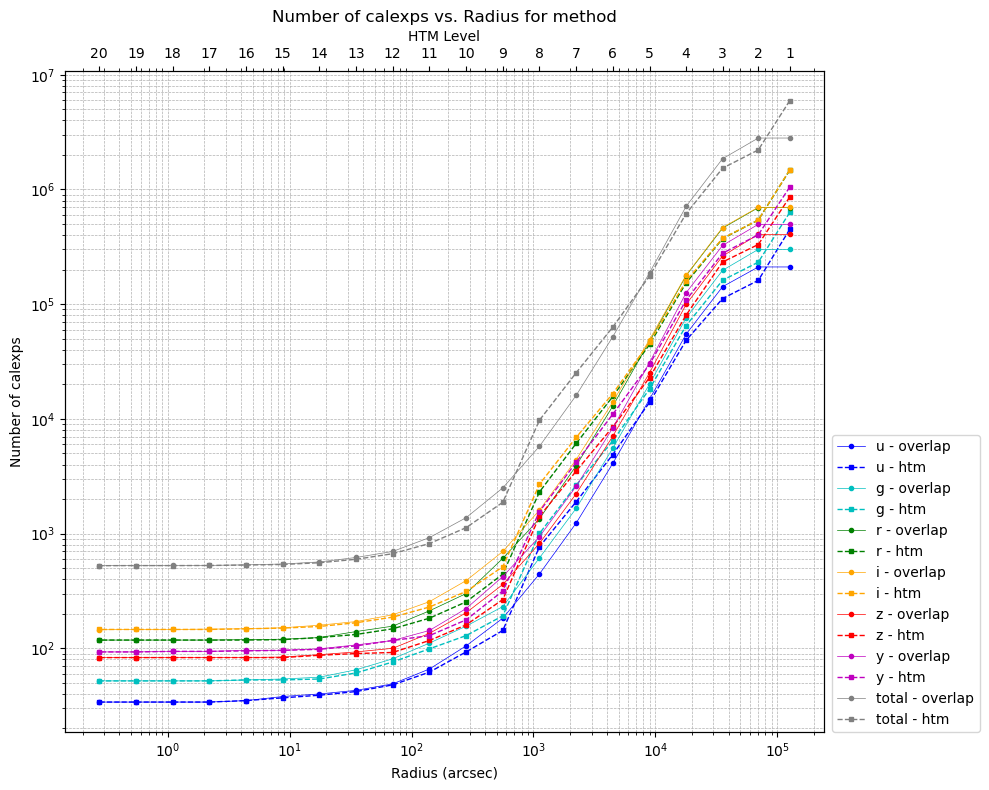

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("n_calexps.csv", index_col=[0, 1])
df.columns = df.columns.astype(float)
bands_colors = {'u': 'b', 'g': 'c', 'r': 'g', 'i': 'orange', 'z': 'r', 'y': 'm'}
fig, ax1 = plt.subplots(figsize=(10,8))
radius_values = df.loc[("radius", "radius")].values*3600
for (band, type_), values in df.iterrows():
    if band != "radius":
        marker = "o" if type_ == "overlap" else "s"
        # alpha = 1 if type_ == "overlap" else 0.5
        ls = "-" if type_ == "overlap" else "--"
        lw = 0.5 if type_ == "overlap" else 1
        color = bands_colors.get(band, "gray")
        ax1.plot(radius_values, values, alpha = 1, lw=lw, ls=ls, 
                 color=color, marker=marker, ms=3, label=f"{band} - {type_}")


ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("Radius (arcsec)")
ax1.set_ylabel("Number of calexps")
ax1.set_title("Number of calexps vs. Radius for method")
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)
ax2 = ax1.twiny()
ax2.set_xscale("log")
htm_levels = range(1,21)  
ax2.set_xlim(ax1.get_xlim())  
ax2.set_xticks(radius_values)  
ax2.set_xticklabels(htm_levels) 
ax2.set_xlabel("HTM Level")
ax1.legend(loc=(1.01, 0))

plt.tight_layout()
plt.savefig("n_calexps_over_htm.png", bbox_inches='tight', pad_inches=0.1)

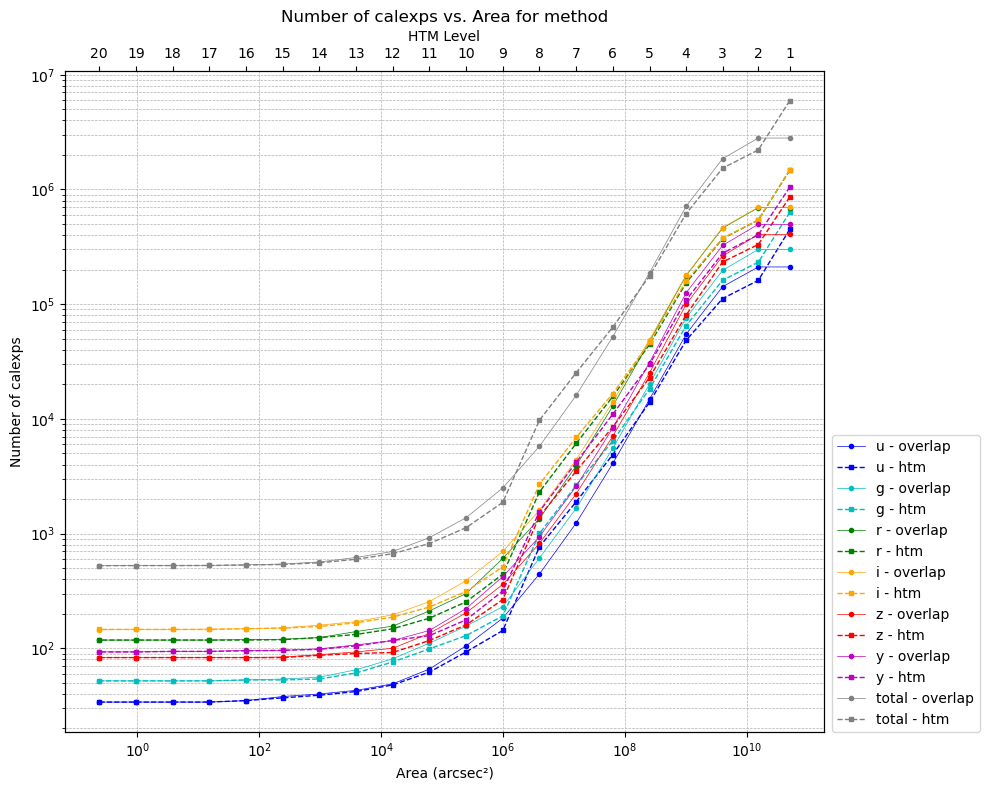

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("n_calexps.csv", index_col=[0, 1])
df.columns = df.columns.astype(float)

bands_colors = {'u': 'b', 'g': 'c', 'r': 'g', 'i': 'orange', 'z': 'r', 'y': 'm'}

fig, ax1 = plt.subplots(figsize=(10, 8))

radius_values = df.loc[("radius", "radius")].values * 3600  # Convert to arcsec
area_values = np.pi * (radius_values ** 2)  # Compute area

for (band, type_), values in df.iterrows():
    if band != "radius":
        marker = "o" if type_ == "overlap" else "s"
        ls = "-" if type_ == "overlap" else "--"
        lw = 0.5 if type_ == "overlap" else 1
        color = bands_colors.get(band, "gray")
        ax1.plot(area_values, values, alpha=1, lw=lw, ls=ls,
                 color=color, marker=marker, ms=3, label=f"{band} - {type_}")

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("Area (arcsec²)")
ax1.set_ylabel("Number of calexps")
ax1.set_title("Number of calexps vs. Area for method")
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

ax2 = ax1.twiny()
ax2.set_xscale("log")
htm_levels = range(1, 21)  
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(area_values)  
ax2.set_xticklabels(htm_levels)  
ax2.set_xlabel("HTM Level")

ax1.legend(loc=(1.01, 0))

plt.tight_layout()
plt.savefig("n_calexps_vs_area.png", bbox_inches='tight', pad_inches=0.1)


In [39]:
bands_colors.keys()

dict_keys(['u', 'g', 'r', 'i', 'z', 'y'])

In [44]:
df.loc[("radius", "radius")].values

array([3.52643897e+01, 1.94712206e+01, 9.91648054e+00, 4.98073124e+00,
       2.49317550e+00, 1.24714756e+00, 6.23617711e-01, 3.11814347e-01,
       1.55907860e-01, 7.79540159e-02, 3.89770188e-02, 1.94890000e-02,
       9.74400000e-03, 4.87200000e-03, 2.43600000e-03, 1.21800000e-03,
       6.09000000e-04, 3.05000000e-04, 1.52000000e-04, 7.60000000e-05])

In [28]:
print(df.index.names)
print(df.index.levels)

['band', 'type']
[['g', 'i', 'r', 'radius', 'total', 'u', 'y', 'z'], ['htm', 'overlap', 'radius']]


In [35]:
from tools import spherical_area
from lsst.sphgeom import HtmPixelization, UnitVector3d, LonLat
levels = np.arange(6,20)
n_calexps_htm = []
n = 1
vertexs = []
bound_circ = []
ra=57.59451; dec=-32.48115
for lvl in levels:
    print(f"||||||||||||||------------LEVEL: {lvl} -----------||||||||||||||")
    process = Run(name = f"test_triangle", htm_level=lvl)
    params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
    process.add_lc(params[0], ra=57.59451, dec=-32.48115, band="i")
    n_calexps_htm.append(len(process.calexp_data_ref))
    pixelization = HtmPixelization(lvl)
    htm_id = pixelization.index(UnitVector3d(LonLat.fromDegrees(ra, dec)))
    htm_triangle = pixelization.triangle(htm_id)
    r = htm_triangle.getBoundingCircle().getOpeningAngle().asDegrees()
    bound_circ.append(r)
    vertexs.append(htm_triangle.getVertices())

||||||||||||||------------LEVEL: 6 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 36775 - HTM_level=6 (bounded by a circle of radius ~4489.73 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 16636 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 7 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 147102 - HTM_level=7 (bounded by a circle of radius ~2245.02 arcsec.)
Found 6894 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 8 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 588408 - HTM_level=8 (bounded by a circle of radius ~1122.53 arcsec.)
Found 2697 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 9 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 2353633 - HTM_level=9 (bounded by a circle of radius ~561.27 arcsec.)
Found 514 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 10 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 9414534 - HTM_level=10 (bounded by a circle of radius ~280.63 arcsec.)
Found 313 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 11 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 37658136 - HTM_level=11 (bounded by a circle of radius ~140.32 arcsec.)
Found 229 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 12 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 150632544 - HTM_level=12 (bounded by a circle of radius ~70.16 arcsec.)
Found 187 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 13 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 602530178 - HTM_level=13 (bounded by a circle of radius ~35.08 arcsec.)
Found 167 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 14 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 2410120715 - HTM_level=14 (bounded by a circle of radius ~17.54 arcsec.)
Found 155 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 15 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 9640482861 - HTM_level=15 (bounded by a circle of radius ~8.77 arcsec.)
Found 150 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 16 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 38561931445 - HTM_level=16 (bounded by a circle of radius ~4.38 arcsec.)
Found 148 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 17 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 154247725781 - HTM_level=17 (bounded by a circle of radius ~2.19 arcsec.)
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 18 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 616990903127 - HTM_level=18 (bounded by a circle of radius ~1.10 arcsec.)
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 19 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 2467963612508 - HTM_level=19 (bounded by a circle of radius ~0.55 arcsec.)
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
